<a href="https://colab.research.google.com/github/nagapurisatwika/Task-3-Linear-Regression-using-Car-price-prediction-/blob/main/Task_3(Car_Price_Prediction_using_Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("CarPrice.csv")
print("🔹 First 5 Rows of Dataset:")
print(df.head())

🔹 First 5 Rows of Dataset:
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio hor

In [ ]:
# Check data types and missing values
print("\n🔹 Dataset Info:")
print(df.info())

# Drop irrelevant column
df = df.drop(columns=['CarName'])

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

print("\n🔹 Data After Preprocessing:")
print(df.head())


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-n

In [ ]:
# Independent variables (features)
X = df.drop('price', axis=1)

# Dependent variable (target)
y = df['price']

In [ ]:
# Splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict prices on the test data
y_pred = model.predict(X_test)


In [ ]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n🔹 Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")



🔹 Evaluation Metrics:
Mean Absolute Error (MAE): 1990.61
Mean Squared Error (MSE): 7852574.20
R² Score: 0.90


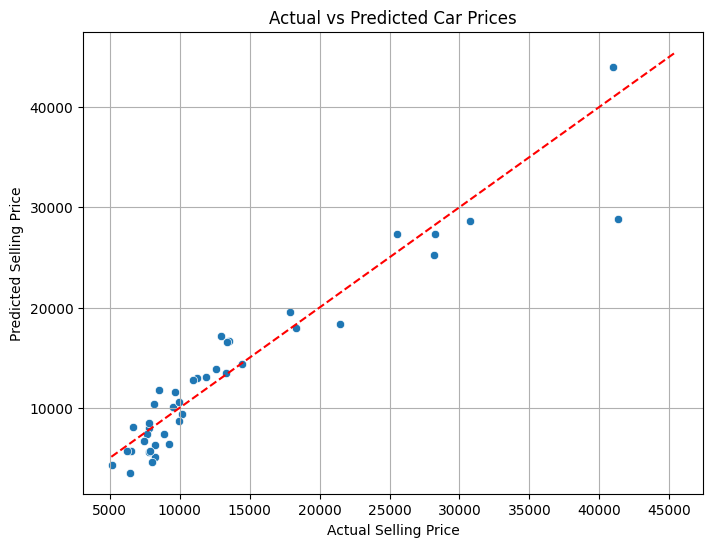

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()


In [ ]:
# Show the effect of each feature
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\n🔹 Coefficients of the Model:")
print(coefficients)



🔹 Coefficients of the Model:
                        Coefficient
car_ID                -1.739063e+01
symboling              1.019304e+02
wheelbase              9.882696e+01
carlength             -7.822275e+01
carwidth               6.604161e+02
carheight              2.061142e+02
curbweight             5.156732e+00
enginesize             9.905210e+01
boreratio             -1.412978e+03
stroke                -3.194342e+03
compressionratio       1.229703e+02
horsepower            -1.213577e+00
peakrpm                1.678089e+00
citympg               -1.684053e+02
highwaympg             1.773536e+02
fueltype_gas          -2.613708e+02
aspiration_turbo       2.105024e+03
doornumber_two        -4.211396e+02
carbody_hardtop       -2.928003e+03
carbody_hatchback     -2.170232e+03
carbody_sedan         -1.606960e+03
carbody_wagon         -3.242885e+03
drivewheel_fwd        -1.270262e+02
drivewheel_rwd         1.109475e+03
enginelocation_rear    1.189446e+04
enginetype_dohcv      -5.643177e+0